In [ ]:
%plot

In [1]:
x.Up = [0.314408204725, 0.924562998917;
      0.418908136364, 0.0567832166507;
      0.638411017922, 0.0937655989925;
      0.515245531199, 0.645743428542;
      0.353656536597, 0.238034869386;
      0.847305079228, 0.120770107562;
      0.91308702203, 0.398184318986];

x.M = [0.789504411938;
      0.0700342046044]';

x.Vp = [0.314408204725, 0.418908136364, 0.638411017922, 0.515245531199, 0.353656536597, 0.847305079228, 0.91308702203;
      0.924562998917, 0.0567832166507, 0.0937655989925, 0.645743428542, 0.238034869386, 0.120770107562, 0.398184318986]';


d.Up = [0.100471128883, 0.462553233178;
      0.932588424076, 0.111724492753;
      0.0584757719164, 0.608626615927;
      0.99733387416, 0.697516827299;
      0.895611285759, 0.827297280373;
      0.0203294852855, 0.272792569507;
      0.969786195409, 0.908731538566];

d.M = [0.450438249143;
      0.579476885744]';

d.Vp = [0.100471128883, 0.932588424076, 0.0584757719164, 0.99733387416, 0.895611285759, 0.0203294852855, 0.969786195409;
      0.462553233178, 0.111724492753, 0.608626615927, 0.697516827299, 0.827297280373, 0.272792569507, 0.908731538566]';

In [2]:
m = 7;
n = 7;
k = 2;
manifold = fixedrankembeddedfactory(m, n, k);

problem.M = manifold;

In [3]:
norm_d = problem.M.retr(x, d, 1)

Reference to non-existent field 'S'.


In [4]:
A = [0, 1, 1, 1, 0, 0, 0;
     1, 0, 1, 1, 0, 0, 0;
     1, 1, 0, 1, 0, 0, 0;
     1, 1, 1, 0, 1, 1, 1;
     0, 0, 0, 1, 0, 1, 1;
     0, 0, 0, 1, 1, 0, 1;
     0, 0, 0, 1, 1, 1, 0];

In [5]:
1:10

ans =

     1     2     3     4     5     6     7     8     9    10


In [6]:
% Define the problem cost function and its Euclidean gradient.
%problem.cost  = @(x) sum(sum(log(1 - exp(-x.U*x.S*x.V' .* A)) - x.U*x.S*x.V' .* (1-A) ));
%problem.egrad = @(x) 2 * (x.U*x.S*x.V' - A);

% Define the problem cost function and its Euclidean gradient.
problem.cost  = @(x) norm(x.U*x.S*x.V' - A, 'fro')^2;
problem.egrad = @(x) 2 * (x.U*x.S*x.V' - A);

% Numerically check gradient consistency (optional).
%checkgradient(problem);

% Solve.
%[x, xcost, info, options] = trustregions(problem);

In [7]:
infos = {};
M = 100;
options.verbosity = 0;
for i=1:M
    [x, xcost, info, options] = steepestdescent(problem, [], options);
    infos{i} = info;
end

In [8]:
%plot ?

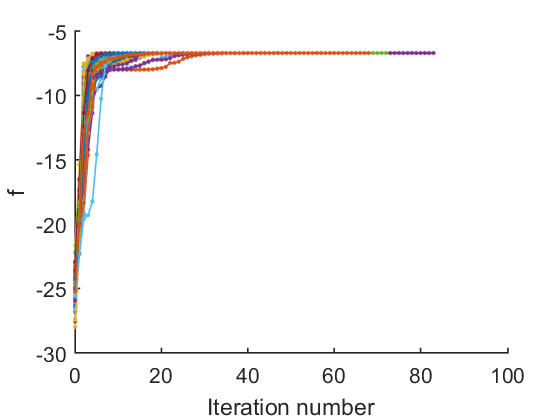

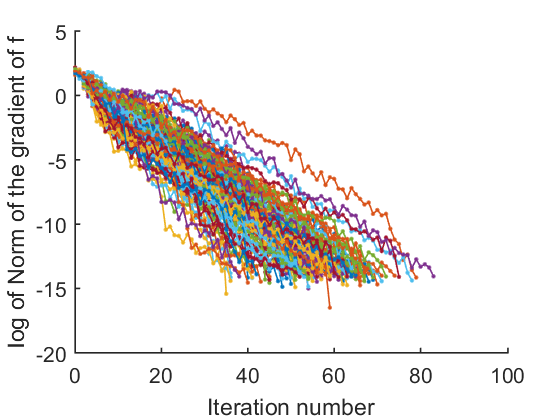

In [9]:
figure();
hold on;
for i=1:M
    % Display some statistics.
    plot([infos{i}.iter], log([infos{i}.gradnorm]), '.-');
    xlabel('Iteration number');
    ylabel('log of Norm of the gradient of f');
end
figure();
hold on;
for i=1:M
    plot([infos{i}.iter], -[infos{i}.cost], '.-');
    xlabel('Iteration number');
    ylabel('f');
end